In [21]:
#import d4rl 
import gym
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
from collections import deque
import d4rl  # Ensure d4rl is imported to register the environments
import os


/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
No module named 'flow'
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/glfw/__init__.py:917: GLFWError: (65550) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/envs/registration.py:415: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
pybullet build time: Jan 29 2025 23:19:57


In [15]:
mkdir ../../public/sparse_d4rl


In [28]:
cd ../../public/sparse_d4rl/

/public/sparse_d4rl


In [29]:
pwd

'/public/sparse_d4rl'

In [22]:
#reduce the dimension of the action space with PCA
from sklearn.decomposition import PCA
class PCAReduction:
    def __init__(self, n_components):
        self.pca = PCA(n_components=n_components)
        self.fitted = False

    def fit(self, data):
        self.pca.fit(data)
        self.fitted = True

    def transform(self, data):
        if not self.fitted:
            raise RuntimeError("PCA model is not fitted yet.")
        return self.pca.transform(data)

    def inverse_transform(self, data):
        if not self.fitted:
            raise RuntimeError("PCA model is not fitted yet.")
        return self.pca.inverse_transform(data)

In [33]:
def reduce_and_plot(env_name,limits = [-7, 0]):   

    env = gym.make(env_name)
    dataset = env.get_dataset() 
    pca_reducer = PCAReduction(n_components=1)
    pca_reducer.fit(dataset['actions'])
    pca_reducer_obs = PCAReduction(n_components=1)

    pca_reducer_obs.fit(dataset['observations'])

    # Transform the actions in the dataset
    reduced_actions = pca_reducer.transform(dataset['actions'])
    reduced_obs = pca_reducer_obs.transform(dataset['observations'])
    # plot the actions versus the rewards
    import matplotlib.pyplot as plt
    plt.scatter(reduced_actions, reduced_obs, c= dataset['rewards'], cmap='viridis')
    plt.colorbar(label='Rewards')
    plt.xlabel('Actions')
    plt.ylabel('States')
    plt.title('State-Action Space Colored by Rewards')
    plt.show()

    #take out 90% of the states < -7 and actions less than 0 in the reduced space
    indices_to_keep = []
    for i in range(len(reduced_obs)):
        if reduced_obs[i, 0] < limits[0] and reduced_actions[i, 0] < limits[1]:
            if random.random() > 0.99:
                indices_to_keep.append(i)
        else:
            indices_to_keep.append(i)
    filtered_obs = reduced_obs[indices_to_keep]
    filtered_actions = reduced_actions[indices_to_keep]
    filtered_rewards = dataset['rewards'][indices_to_keep]
    # filtered_next_obs = dataset['next_observations'][indices_to_keep]
    # filtered_dones = dataset['terminals'][indices_to_keep]
    print(f"Original dataset size: {len(dataset['observations'])}")
    import matplotlib.pyplot as plt
    plt.scatter(filtered_actions, filtered_obs, c= filtered_rewards, cmap='viridis')
    plt.colorbar(label='Rewards')
    #horizontal and vertical lines at x=0 and y=-7
    plt.axhline(y=filtered_obs.min(), color='r', linestyle='--')
    plt.axvline(x=filtered_actions.min(), color='r', linestyle='--')
    plt.axhline(y=filtered_obs.max(), color='r', linestyle='--')
    plt.axvline(x=filtered_actions.max(), color='r', linestyle='--')
    plt.xlabel('Actions')
    plt.ylabel('States')
    plt.title('State-Action Space Colored by Rewards')
    plt.show()

    print(len(filtered_obs))

    filtered_dataset = {
    'observations': dataset['observations'][indices_to_keep],
    'actions': dataset['actions'][indices_to_keep],
    'rewards': dataset['rewards'][indices_to_keep],
    'next_observations': dataset['next_observations'][indices_to_keep],
    'terminals': dataset['terminals'][indices_to_keep]
        }
    return filtered_dataset


/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/envs/mujoco/mujoco_env.py:46: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/spaces/box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:69: UserWarning: WARN: Agent's minimum action space value is -infinity. This is probably too low.
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:73: UserWarning: WARN: Agent's maximum act

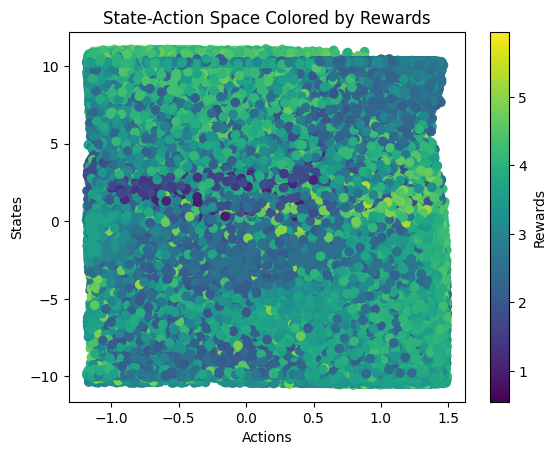

Original dataset size: 1000000


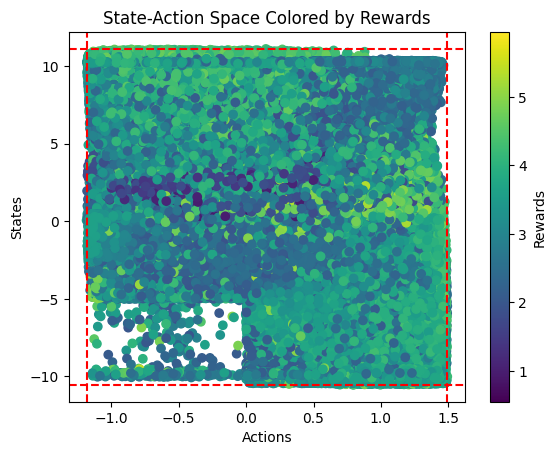

966248


/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/envs/mujoco/mujoco_env.py:46: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/spaces/box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:69: UserWarning: WARN: Agent's minimum action space value is -infinity. This is probably too low.
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:73: UserWarning: WARN: Agent's maximum act

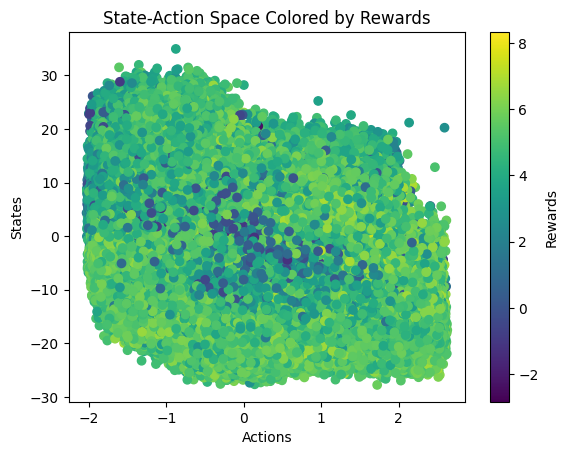

Original dataset size: 1000000


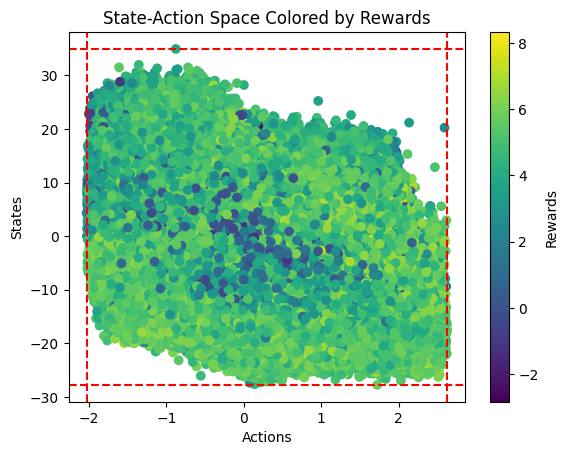

970610


/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/envs/mujoco/mujoco_env.py:46: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/spaces/box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:69: UserWarning: WARN: Agent's minimum action space value is -infinity. This is probably too low.
  logger.warn(
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:73: UserWarning: WARN: Agent's maximum act

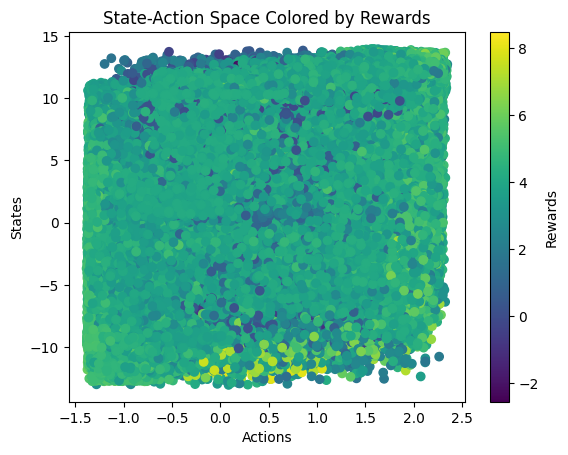

Original dataset size: 1000000


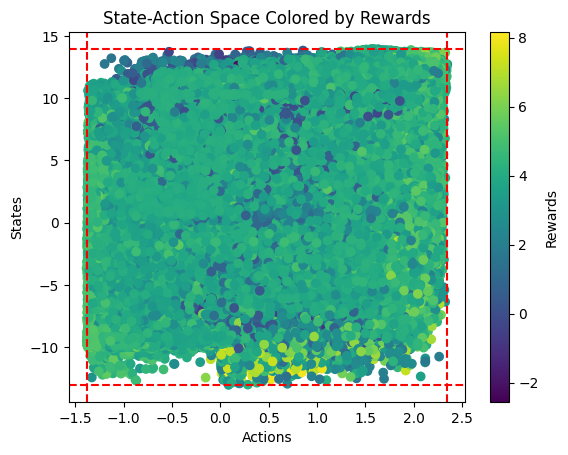

972494


In [34]:
hopper_d = reduce_and_plot('hopper-medium-v2', limits= [-5, 0])
halfcheetah_d = reduce_and_plot('halfcheetah-medium-v2', limits = [-20, 0])
walker2d_d  = reduce_and_plot('walker2d-medium-v2', limits = [-10, 0])


import pickle
with open('../../public/sparse_d4rl/hopper-medium-v2.pkl', 'wb') as f:
    pickle.dump(hopper_d, f)
with open('../../public/sparse_d4rl/halfcheetah-medium-v2.pkl', 'wb') as f:
    pickle.dump(halfcheetah_d, f)
with open('../../public/sparse_d4rl/walker2d-medium-v2.pkl', 'wb') as f:
    pickle.dump(walker2d_d, f)